In [51]:
import json
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [52]:
poly_correct = np.array(
    [-100330, 65070, 9596, 57850, 35652, 105533, -12476, -46863, -37129, -56173, -21068, 2324, 115540, 44633, 125101, 3586, 69993, -81687, -64128, 120572, 2307, 130526, 4041, -41650, 84699, -8418, 74822, 109619, -91410, -91558, 115894, 23794, 38581, 97367, -68344, 13693, -29260, -93738, 25493, 28466, -98993, -35421, -129186, -35972, -98782, 5229, 121668, -36138, 43042, 126578, -51112, -26829, 88126, -48827, -6483, 91640, 26814, 122947, 26573, 69248, 24721, -59507, 95958, 40139, -14569, 50396, -112991, -68730, 66400, -78235, -86549, -76860, 64682, -31281, -67048, -120548, -94141, -16141, -41256, -107494, 123510, 92927, -46082, -106954, 123712, -54074, -68055, -27761, 95540, -34279, 88614, -16752, -106508, 110918, -79361, -111904, -61989, -37948, -98516, -55493, 39202, -40934, -32598, 76273, 51232, -41914, 65442, -16213, 55769, 94113, 50226, 120092, -128689, -94408, -61484, -19585, -88952, -76813, 2824, 91206, -56337, -118806, -96835, 15049, 128028, 59495, -17594, -36106, 17150, 47484, 87598, -26352, -53032, -77067, -39068, 40578, 11118, -28570, 75283, -34653, -5989, 63604, -62640, 129983, 82192, -4490, 12561, -25277, -66376, -122930, 59076, -108514, 45386, -3452, -26574, 77009, 107691, 130619, 83009, -15992, 67954, -115355, 51392, 109151, 14436, 87167, 98658, 26737, -40221, -51762, 14194, -41174, 57083, 83262, -28556, -118523, -21025, 102215, -112607, 13209, 29419, 91941, -11896, 90350, 8775, 28083, -2437, -100647, 57982, -82079, 43127, -121490, 55338, -76765, -88055, 57275, 82896, 45758, 115959, 83102, 20486, 108583, 130356, 8121, 24164, 33415, 127913, -66700, 126187, -94234, -129363, 19066, 49679, -42788, -37787, 76823, 87773, -78390, -93583, 34618, 10559, 16455, 20048, -108818, 22738, -81005, -38836, 96902, 123986, -110533, 123344, -60505, -107167, 60008, 122648, 63987, -41240, -90385, -36204, 125741, 89346, -67624, 85577, -51871, -75793, 35865, 84258, -26867, -21851, -32105, -7085, -34076, -79382, 103232, -3429, 17899],
    dtype=np.int32
)

In [53]:
def is_perfect_glitch(faulted_poly: np.ndarray, correct_poly: np.ndarray = poly_correct, coeffs_per_iter: int = 4) -> bool:
    # zero good iters would be total trash (probably) and 64 good iters would be no glitch
    for i in range(1, 63 + 1):
        # index of the first zero coefficient due to a fault
        split_index = i * coeffs_per_iter
        
        same_as_expected = np.all(faulted_poly[:split_index] == correct_poly[:split_index])
        rest_faulted = np.all(faulted_poly[split_index:] == 0)
        
        if same_as_expected and rest_faulted:
            return i
    return None

In [61]:
files_all = [
    '77param6798f8cc-b9ed-4545-9d30-8d0ea2e28ac6.json',
    'poly_more_offsets_around_the_offsetmorewidthe1bfd82a-e3c8-466e-a5fb-e33e073c5e07.json',
    'poly_more_offsets_around_the_offsetmorewidth6a4e21cc-2aa7-49e5-849a-9486cf6ff91d.json',
    'poly_more_offsets_around_the_offsetba12fb8c-ea18-4d12-b70e-b2246460387a.json',
    'poly_otherparam_128_result36916591-50f6-4670-81ee-0a018b58f284.json',
    'poly_second_fixed_result90889173-bab7-499f-9817-579068697dd7.json',
    'poly_second_result0a4aae14-b91e-4bad-a2e1-50c2524b2176.json',
    'poly_second_result0a4aae14-b91e-4bad-a2e1-50c2524b2176.json',
    'poly_first_result1e99bf50-1570-4d94-8fdd-a638ad071e37.json',
]
files_selected = files_all[:3] # only the last three are compatible with our new polynomial
file_selected = files_all[0]
files_selected

['77param6798f8cc-b9ed-4545-9d30-8d0ea2e28ac6.json',
 'poly_more_offsets_around_the_offsetmorewidthe1bfd82a-e3c8-466e-a5fb-e33e073c5e07.json',
 'poly_more_offsets_around_the_offsetmorewidth6a4e21cc-2aa7-49e5-849a-9486cf6ff91d.json']

In [64]:
data_points = []
for file in files_selected:
    with open(file) as f:
        file_content = json.load(f)
        for i in range(len(file_content['faulted_polys'])):
            poly_numpy = np.array(file_content['faulted_polys'][i], dtype=np.int32)
            data_points.append({
                'faulted_poly': poly,
                'params': file_content['faulted_polys_params'][i],
                'iteration': is_perfect_glitch(poly_numpy)
            })
len(data_points), "0 = ext_offset, 1 = offset, 2 = width"

(3193, '0 = ext_offset, 1 = offset, 2 = width')

In [63]:
data_perfect = list(filter(lambda p: p['iteration'] is not None, data_points))
len(data_perfect)

285

In [73]:
all_discovered_iterations = set()
for point in data_perfect:
    all_discovered_iterations.update(set([point['iteration']]))
all_discovered_iterations

{2, 32, 34, 35, 38}

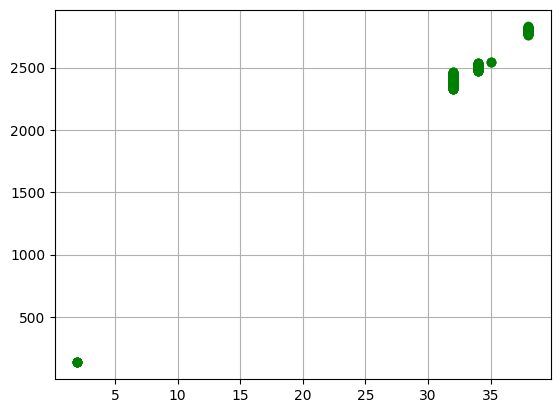

In [74]:
iters = list(map(lambda p: p['iteration'], data_perfect))
ext_offsets = list(map(lambda p: p['params'][0], data_perfect))
fig = plt.figure()
ax = fig.subplots()
ax.grid(True)
ax.plot(iters, ext_offsets, 'go')

0 = ext_offset, 1 = offset, 2 = width
iter = 2 ext_offset = 135 offset = 7.03125 width = 7.03125
iter = 2 ext_offset = 136 offset = 7.03125 width = 7.03125
iter = 2 ext_offset = 137 offset = 7.03125 width = 7.03125
iter = 2 ext_offset = 138 offset = 7.03125 width = 7.03125
29 defaultdict(<function <lambda> at 0x7fd4ed0d1af0>, {135: 2, 136: 2, 137: 2, 138: 2, 139: 2, 140: 2, 141: 2, 142: 2, 143: 2, 144: 2, 145: 2, 146: 2, 147: 2, 148: 2, 149: 2, 150: 2, 151: 2, 152: 2, 153: 1, 154: 1, 155: 1, 156: 1, 157: 1, 158: 1, 159: 1, 160: 1, 161: 1, 162: 1, 163: 1})
1810 1810
dict_keys([135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163])


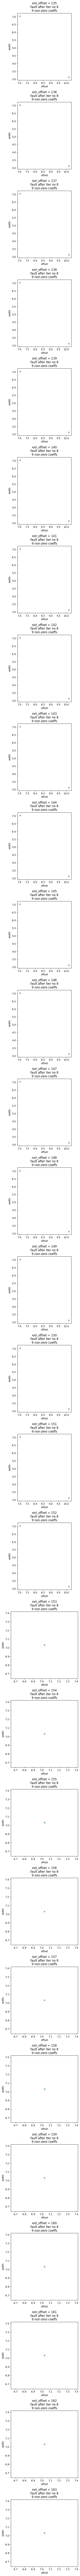

In [23]:

poly_faulted = lambda poly: np.sum(poly[-20:] == 0) >= 10
offsets_f = set()
offset_count_f = defaultdict(lambda: 0)
print(first_data['faulted_polys_params_descropton'])
true_fault_polys = defaultdict(lambda: [])
true_fault_params = defaultdict(lambda: [])
for i, (ext_offset, offset, width) in enumerate(first_data['faulted_polys_params']):
    it = is_perfect_glitch(first_data['faulted_polys'][i])
    if it is not None:
        #print(first_data['faulted_polys'][i], f'ext_offset = {ext_offset}', f'offset = {offset}', f'width = {width}')
        print(f'iter = {it}', f'ext_offset = {ext_offset}', f'offset = {offset}', f'width = {width}')
    if poly_faulted(first_data['faulted_polys'][i]):
        #print(first_data['faulted_polys'][i], f'ext_offset = {ext_offset}', f'offset = {offset}', f'width = {width}')

        offsets_f.update({ext_offset})
        offset_count_f[ext_offset] += 1
        
        true_fault_polys[ext_offset] += [first_data['faulted_polys'][i]]
        true_fault_params[ext_offset] += [first_data['faulted_polys_params'][i]]
print(len(offset_count_f), offset_count_f)
print(len(first_data['faulted_polys_params']), len(first_data['faulted_polys']))
print(true_fault_polys.keys())


        
        


def commom_trailing_zeros(polys: [np.ndarray]) -> (int, int):
    """First entry is common zero, second is common different"""
    percent = .8 # how much tolerance for random equal to expected or 
    m = np.vstack(polys)
    c = np.vstack((correct_poly_first_second,) * np.shape(m)[0])
    cmn_zero = None
    cmn_equal = None
    for i in range(np.shape(m)[1]):
        max_num_zero = np.shape(m)[1]
        max_num_zero_vec = np.array((max_num_zero,) * np.shape(m)[0])
        
        
        if np.all(m[:,:i] == c[:,:i]): # column i and previous (to the left) is same as the correct one
            cmn_equal = i
        
        
        if np.all(m[:,i:] == 0):# column i and following (to the right) is fully zero
            cmn_zero = i
        
        if cmn_zero is not None and cmn_equal is not None:
            break
    
    #print(correct_poly_first_second[:cmn_zero + 2])
    #print(m[:, :cmn_zero + 2])
    return cmn_zero, cmn_equal


fig = plt.figure(figsize=(5, 5 * len(true_fault_params)))
axes = fig.subplots(len(true_fault_params))
for i, ext_offset in enumerate(true_fault_params.keys()):
    offsets = list(map(lambda params: params[1], true_fault_params[ext_offset]))
    widths = list(map(lambda params: params[2], true_fault_params[ext_offset]))
    zero_index, diff_index = commom_trailing_zeros(true_fault_polys[ext_offset])
    ax = axes[i]
    #ax = axes
    ax.set_aspect('equal', 'box')
    ax.plot(offsets, widths, 'gx')
    ax.set_xlabel('offset')
    ax.set_ylabel('width')
    ax.set_title(f'ext_offset = {ext_offset}\nfault after iter no {diff_index}\n{zero_index} non-zero coeffs')
    #for xy in zip(offsets, widths):
    #    ax.annotate('(o=%.0f, w=%.0f)' % xy, xy=xy, fontsize=7)
    #break
    #for i in range(len(true_fault_params[ext_offset])):

fig.tight_layout()
#true_fault_params.keys()

In [ ]:
previous_offset = None
for key, value in offset_count_f.items():
    
    print(key, value, -1 if previous_offset is None else key - previous_offset)
    previous_offset = key

In [ ]:
plt.rcparams